# Statistical Methods for Outlier Detection Tutorial

Outlier detection is a crucial step in data preprocessing to ensure accurate statistical analysis and optimal performance of machine learning models. In this guide, we will explore several statistical methods for detecting outliers using Python, including the Z-score, Modified Z-score, IQR (Interquartile Range) method, Grubbs' Test, and visual methods like box plots.

## 1. Import Required Libraries

Let's start by importing the necessary libraries. We’ll use pandas for data manipulation, numpy for numerical operations, and matplotlib and seaborn for visualization:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 2. Load Your Data

Load your dataset into a DataFrame. Replace 'your_data.csv' with the path to your actual data file.

In [6]:
data_url = 'https://raw.githubusercontent.com/chriskhanhtran/kaggle-house-price/refs/heads/master/Data/train.csv'
df = pd.read_csv(data_url)

display(df.head())
print()

print(df.dtypes)
print()

print(df.shape)
print()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object

## 3. Z-Score Method

The Z-score measures how many standard deviations an element is from the mean. A common threshold is to label all data points more than 3 standard deviations away from the mean as outliers.

In [44]:
## Remove Not Necessery Columns 
dropdf = df.copy()           # Copy the data frame first into new df

to_drop = ['Alley', 
           'MasVnrType', 
           'FireplaceQu',
           'PoolQC', 
           'Fence', 
           'MiscFeature']
dropdf.drop(to_drop, inplace=True, axis=1)

newdf = dropdf.copy()           # Copy the data frame first into new df
newdf.dropna(inplace=True)  # This will remove all rows with any missing values.



In [23]:
zscoreDF = newdf[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

z_scores = np.abs(stats.zscore(zscoreDF))

threshold = 3
outliers_z = (z_scores > threshold).any(axis=1)
df_outliers_z = zscoreDF[outliers_z]

print(f"Detected outliers using Z-score:\n{df_outliers_z}")


Detected outliers using Z-score:
      LotFrontage  MasVnrArea  GarageYrBlt
58           66.0      1031.0       2006.0
70           95.0      1115.0       1973.0
93           60.0         0.0       1900.0
105          75.0       768.0       2003.0
115          34.0      1129.0       1999.0
178          63.0       748.0       2009.0
197         174.0         0.0       1918.0
224         103.0       922.0       2003.0
231         174.0       506.0       1995.0
297          66.0      1600.0       1997.0
313         150.0         0.0       1965.0
349          56.0       870.0       2006.0
477         105.0       772.0       2006.0
517          79.0       921.0       1996.0
523         130.0       762.0       2007.0
691         104.0      1170.0       1994.0
755          34.0       894.0       1999.0
798         104.0       860.0       2009.0
808          85.0      1047.0       1966.0
825         114.0       816.0       2007.0
898         100.0       760.0       2009.0
909         149.0    

## 4. Modified Z-Score

The Modified Z-score is more robust for data with skewed distributions. It uses the median and MAD (median absolute deviation) instead of the mean and standard deviation.

In [31]:
def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

modified_z_scoreDF = newdf[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
mod_z_scores = modified_z_score(modified_z_scoreDF)
threshold = 3.5
outliers_mod_z = np.abs(mod_z_scores) > threshold
df_outliers_mod_z = modified_z_scoreDF[outliers_mod_z]

print(f"Detected outliers using Modified Z-score:\n{df_outliers_mod_z}")



Detected outliers using Modified Z-score:
      LotFrontage  MasVnrArea  GarageYrBlt
0             NaN         NaN       2003.0
1             NaN         NaN       1976.0
2             NaN         NaN       2001.0
3             NaN         NaN       1998.0
4             NaN         NaN       2000.0
5             NaN         NaN       1993.0
6             NaN         NaN       2004.0
8             NaN         NaN       1931.0
9             NaN         NaN       1939.0
10            NaN         NaN       1965.0
11            NaN         NaN       2005.0
13            NaN         NaN       2006.0
15            NaN         NaN       1991.0
18            NaN         NaN       2004.0
19            NaN         NaN       1958.0
20            NaN         NaN       2005.0
21            NaN         NaN       1930.0
22            NaN         NaN       2002.0
23            NaN         NaN       1976.0
25            NaN       640.0       2007.0
26            NaN         NaN       2005.0
27          

## Interquartile Range (IQR) Method

The IQR method is effective for identifying outliers in non-normal data distributions. Outliers are defined as observations outside the range of [Q1 - 1.5IQR, Q3 + 1.5IQR].

In [39]:
quantileDF = newdf[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

Q1 = quantileDF.quantile(0.25)
Q3 = quantileDF.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (quantileDF < (Q1 - 1.5 * IQR)) | (quantileDF > (Q3 + 1.5 * IQR))
df_outliers_iqr = quantileDF[outliers_iqr.any(axis=1)]

print(f"Detected outliers using IQR:\n{df_outliers_iqr}")



Detected outliers using IQR:
      LotFrontage  MasVnrArea  GarageYrBlt
25          110.0       640.0       2007.0
36          112.0         0.0       1995.0
37           74.0       650.0       1954.0
41          115.0         0.0       1959.0
56           24.0       456.0       1999.0
58           66.0      1031.0       2006.0
70           95.0      1115.0       1973.0
75           21.0         0.0       1973.0
80          100.0       576.0       1968.0
81           32.0       443.0       1998.0
82           78.0       468.0       2007.0
85          121.0       284.0       1991.0
86          122.0         0.0       2005.0
105          75.0       768.0       2003.0
109         105.0       480.0       1977.0
115          34.0      1129.0       1999.0
145          24.0        50.0       2004.0
150         120.0         0.0       1975.0
151         107.0       436.0       2007.0
159         134.0       456.0       2006.0
161         110.0       664.0       2003.0
171         141.0       1

## 6. Grubbs' Test

Grubbs' Test is used to detect a single outlier in a dataset assumed to come from a normally distributed population. It's typically used iteratively to remove the most extreme values one at a time.

In [77]:
def grubbs_test(data):
    mean_data = np.mean(data)
    std_data = np.std(data)
    G = max(abs(data - mean_data)) / std_data
    N = len(data)
    critical_value = stats.t.isf(0.05 / (2 * N), N - 2)
    threshold = ((N - 1) / np.sqrt(N)) * np.sqrt(critical_value**2 / (N - 2 + critical_value**2))
    return G > threshold

# grubbs_testDF = newdf[['LotFrontage', 'MasVnrArea']]
# display(grubbs_testDF.head())
# print()

outliers_grubbs = grubbs_test(newdf[['LotFrontage', 'MasVnrArea']])
df_outliers_grubbs = newdf[outliers_grubbs]

print(f"Detected outlier using Grubbs' Test:\n{df_outliers_grubbs}")


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## 7. Visualization Methods

### 7.1 Box Plot

Box plots visually summarize data distributions and highlight outliers with points beyond the whiskers.

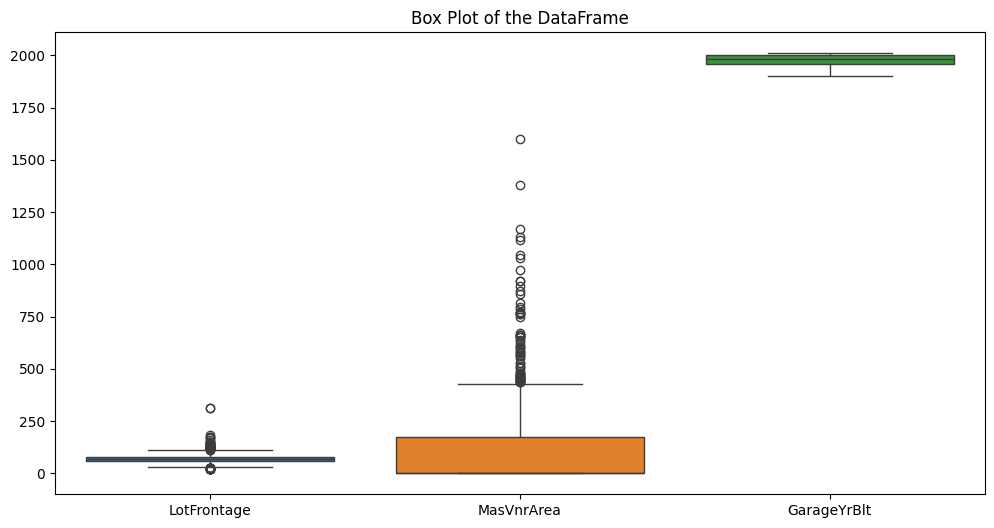

In [38]:
visualDF = newdf[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
plt.figure(figsize=(12, 6))
sns.boxplot(data=visualDF)
plt.title('Box Plot of the DataFrame')
plt.show()


### 7.2 Scatter Plot

Scatter plots are useful for bivariate outlier detection.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


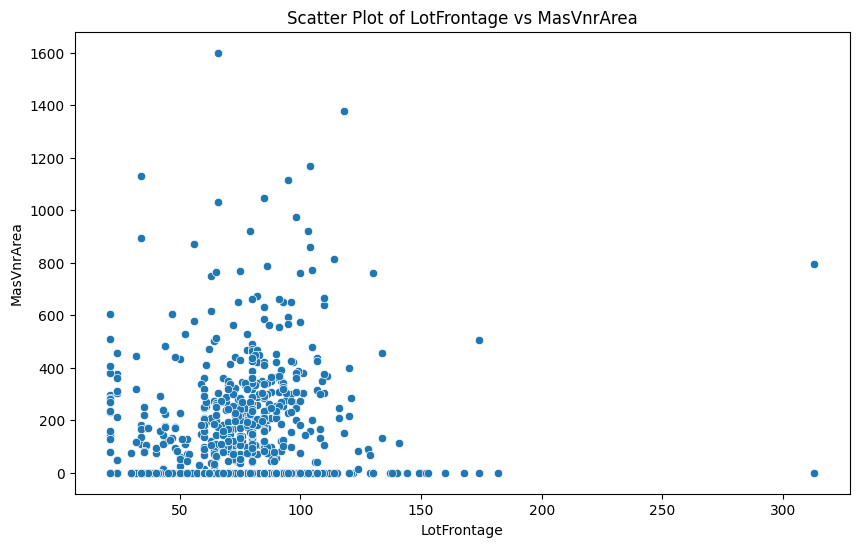

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotFrontage', y='MasVnrArea', data=df)
plt.title('Scatter Plot of LotFrontage vs MasVnrArea')
plt.show()


## Explanation

- Z-score and Modified Z-score: Best for data with (Z-score) or without (Modified Z-score) a normal distribution assumption.

- IQR: Effective for skewed distributions and does not assume normality.

- Grubbs' Test: Useful for datasets where only a single outlier is suspected in normally distributed data.

- Visual Methods: Provide intuitive insights into the data distribution and outlier existence.

# Machine Learning Approaches to Outlier Detection Tutorial


Machine learning approaches to outlier detection provide powerful tools to handle complex datasets with high dimensionality. Here, I'll guide you through three popular algorithms: Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM. We'll use Python and the scikit-learn library to demonstrate these techniques.

## 1. Import Required Libraries

We'll need pandas for handling data, numpy for numerical operations, and scikit-learn for the ML models:

In [49]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### 2. Load and Prepare Your Data

Load your dataset into a DataFrame, and perform any necessary preprocessing like scaling, which is particularly important for algorithms like LOF and One-Class SVM that are sensitive to the range of data.

In [56]:
# Load data
data_url = 'https://raw.githubusercontent.com/chriskhanhtran/kaggle-house-price/refs/heads/master/Data/train.csv'
df = pd.read_csv(data_url)

# Assume 'features' are all columns you want to use for detection
features = df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]

features['LotFrontage'].fillna(value=features['LotFrontage'].mean(), inplace=True)
features['MasVnrArea'].fillna(value=features['MasVnrArea'].mean(), inplace=True)
features['GarageYrBlt'].fillna(value=features['GarageYrBlt'].mean(), inplace=True)

# Scaling the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
display(features_scaled)
print()


array([[-0.22937175,  0.51141841,  1.02115667],
       [ 0.4519361 , -0.57441047, -0.10448286],
       [-0.09311018,  0.32306034,  0.93777596],
       ...,
       [-0.18395123, -0.57441047, -1.56364521],
       [-0.09311018, -0.57441047, -1.18843203],
       [ 0.22483348, -0.57441047, -0.56307674]])

### 3. Isolation Forest


Isolation Forest is an algorithm that works on the principle of isolating anomalies instead of profiling normal data points.



In [61]:
# Initialize the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(features_scaled)

# Predictions
outliers_if = iso_forest.predict(features_scaled)
features['outlier_if'] = outliers_if

# Mark outliers in the dataset
features['outlier_if'] = features['outlier_if'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_if'].value_counts())
print()

display(features.loc[features['outlier_if'] == 'outlier'])
print()


outlier_if
normal     1445
outlier      15
Name: count, dtype: int64



,LotFrontage,MasVnrArea,GarageYrBlt,outlier_if
58,66.0,1031.0,2006.0,outlier
70,95.0,1115.0,1973.0,outlier
115,34.0,1129.0,1999.0,outlier
197,174.0,0.0,1918.0,outlier
231,174.0,506.0,1995.0,outlier
297,66.0,1600.0,1997.0,outlier
523,130.0,762.0,2007.0,outlier
691,104.0,1170.0,1994.0,outlier
755,34.0,894.0,1999.0,outlier
798,104.0,860.0,2009.0,outlier


### 4. Local Outlier Factor (LOF)

LOF measures the local deviation of density of a given data point with respect to its neighbors. It is good for detecting anomalies in a dataset that may not be extreme but are abnormal in their local context.


In [65]:
# Initialize the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)

# Predictions
outliers_lof = lof.fit_predict(features_scaled)
features['outlier_lof'] = outliers_lof

# Mark outliers in the dataset
features['outlier_lof'] = features['outlier_lof'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_lof'].value_counts())
print()

display(features[['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'outlier_lof']].loc[features['outlier_lof'] == 'outlier'])
print()


outlier_lof
normal     1430
outlier      30
Name: count, dtype: int64



,LotFrontage,MasVnrArea,GarageYrBlt,outlier_lof
93,60.000000,0.0,1900.000000,outlier
100,70.049958,28.0,1977.000000,outlier
115,34.000000,1129.0,1999.000000,outlier
131,70.049958,40.0,2000.000000,outlier
164,40.000000,0.0,1926.000000,outlier
174,47.000000,132.0,1986.000000,outlier
197,174.000000,0.0,1918.000000,outlier
201,75.000000,0.0,1980.000000,outlier
210,67.000000,0.0,1978.506164,outlier
215,72.000000,64.0,1957.000000,outlier


### 5. One-Class SVM

One-Class SVM is used for novelty detection where you train the model only on the normal data. It learns the boundaries of these points and classifies any point lying outside the boundary as an outlier.

In [67]:
# Initialize the model
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)

# Fit the model
oc_svm.fit(features_scaled)

# Predictions
outliers_svm = oc_svm.predict(features_scaled)
features['outlier_svm'] = outliers_svm

# Mark outliers in the dataset
features['outlier_svm'] = features['outlier_svm'].apply(lambda x: 'outlier' if x == -1 else 'normal')

print(features['outlier_svm'].value_counts())
print()

display(features[['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'outlier_svm']].loc[features['outlier_svm'] == 'outlier'])
print()


outlier_svm
normal     1434
outlier      26
Name: count, dtype: int64



,LotFrontage,MasVnrArea,GarageYrBlt,outlier_svm
103,94.000000,0.0,2009.0,outlier
212,72.000000,0.0,2009.0,outlier
232,21.000000,297.0,1972.0,outlier
235,21.000000,604.0,1971.0,outlier
286,77.000000,0.0,1962.0,outlier
313,150.000000,0.0,1965.0,outlier
378,88.000000,350.0,2010.0,outlier
412,70.049958,432.0,2009.0,outlier
427,77.000000,0.0,1964.0,outlier
456,34.000000,0.0,1916.0,outlier


## Explanation and Use Cases:

- Min-Max Scaling: Good for cases when you need values in a bounded interval. Susceptible to outliers as they can compress the majority of the data into a narrow range.

- Z-Score Normalization: Suitable for data with properties of a normal distribution. This method standardizes the features so that they are centered around 0 with a standard deviation of 1.

- Robust Scaling: Best for datasets with outliers. This method uses more robust estimates for the center and range of your data.

- Unit Vector Scaling: Useful for text data or when using algorithms that rely on the cosine of angle between vectors.